In [22]:
from datetime import datetime
from finance_utils.backtest import Backtest
import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

start_date = '1987-01-01'
end_date = '2024-08-10'
colours = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

hsi = yf.download('^HSI', start=start_date, end=end_date)
nasdaq = yf.download('^IXIC', start=start_date, end=end_date)
sp500 = yf.download('^GSPC', start=start_date, end=end_date)
dow = pd.read_csv('/Users/henrywzh/Documents/data/^dji_d.csv')

dow = dow.iloc[927:]
dow['date'] = [i.replace('/', '-') for i in dow['Date']]
dow.set_index('date', inplace=True)
dow.index = pd.to_datetime(dow.index, format='%d-%m-%Y')
dow.drop(columns=['Date', 'Volume'], inplace=True)
dow.index.name = 'Date'
dow = dow[(dow.index >= start_date) & (dow.index <= end_date)]

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [23]:
global_index = pd.merge(dow['Close'], sp500['Close'], left_index=True, right_index=True).rename(columns={'Close_x': 'dow', 'Close_y': 'sp500'})
global_index = pd.merge(global_index, nasdaq['Close'], left_index=True, right_index=True).rename(columns={'Close': 'nasdaq'})
global_index = pd.merge(global_index, hsi['Close'], left_index=True, right_index=True).rename(columns={'Close': 'hsi'})
global_index = global_index / global_index.iloc[0]

In [24]:
def rolling_corr(rolling_days = 120, target = 'sp500', check = 'all'):
    global_corr = global_index.rolling(rolling_days).corr().dropna().reset_index()
    global_indexes = ['dow', 'sp500', 'nasdaq', 'hsi']
    
    if check != 'all':
        index = check
        plt.figure(figsize=(10, 6))
        plt.plot(global_corr[global_corr['level_1'] == target]['Date'], global_corr[global_corr['level_1'] == target][index])
        plt.title(f'{index} {rolling_days} rolling days correlation with {target}')
        plt.axhline(y=0, color='grey', linestyle='--')
        plt.show()
        
        return
        
    for index in global_indexes:
        if index == target:
            continue
        
        plt.figure(figsize=(10, 6))
        plt.plot(global_corr[global_corr['level_1'] == target]['Date'], global_corr[global_corr['level_1'] == target][index])
        plt.title(f'{index} {rolling_days} rolling days correlation with {target}')
        plt.axhline(y=0, color='grey', linestyle='--')
        plt.show()

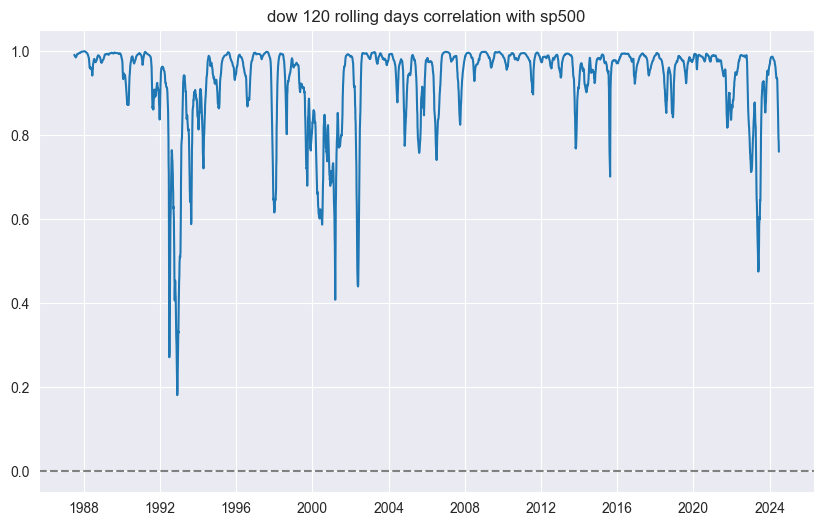

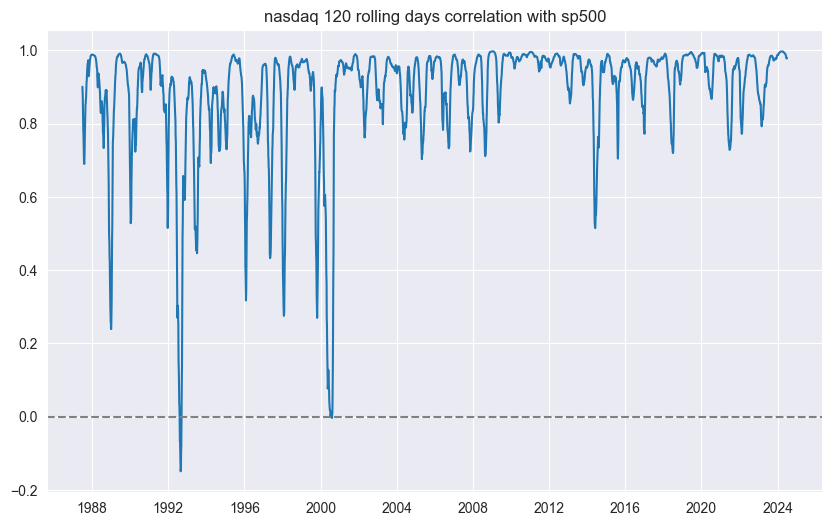

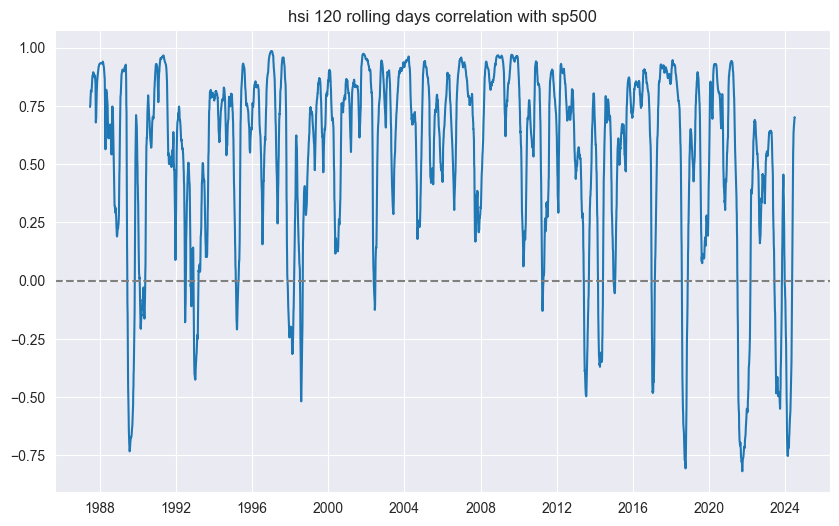

In [25]:
# for i in range(60, 250, 20):
#     rolling_corr(i, check='hsi')

rolling_corr(120)

Hang Seng Index / SP500 Ratio:
- Check for relative market performance
- High ratio represents better market performance in HK

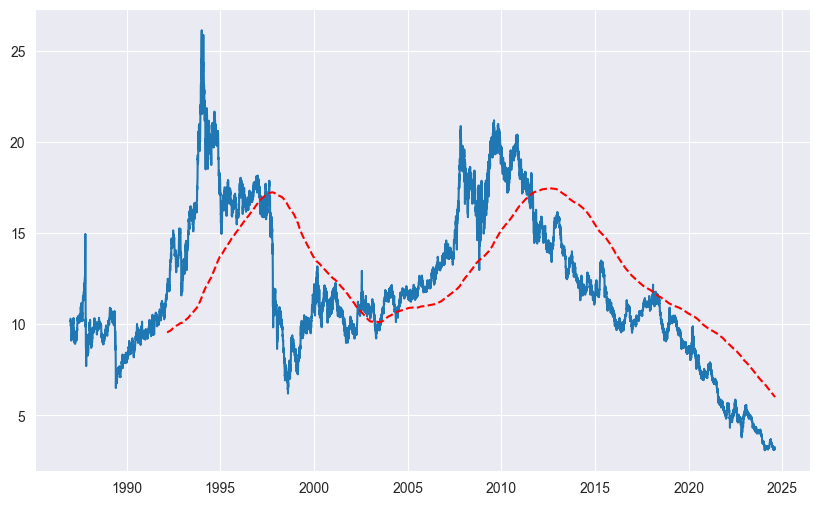

In [42]:
plt.figure(figsize=(10, 6))
ratio = (hsi['Adj Close'] / sp500['Adj Close']).dropna()
plt.plot(ratio)
plt.plot(ratio.rolling(250 * 5).mean(), color='red', linestyle='--')
plt.show()

Nasdaq / Dow Ratio:
- Check for market momentum
- High ratio tends to represent bullish market
- Low ratio tends to represent bearish market

In [3]:
start_date = '1970-01-01'
nasdaq = yf.download('^IXIC', start=start_date)
start_date = nasdaq.index[0]
dow = pd.read_csv('/Users/henrywzh/Documents/data/^dji_d.csv')

dow = dow.iloc[927:]
dow['date'] = [i.replace('/', '-') for i in dow['Date']]
dow.set_index('date', inplace=True)
dow.index = pd.to_datetime(dow.index, format='%d-%m-%Y')
dow.drop(columns=['Date', 'Volume'], inplace=True)
dow.index.name = 'Date'
dow = dow[dow.index >= start_date]

[*********************100%%**********************]  1 of 1 completed


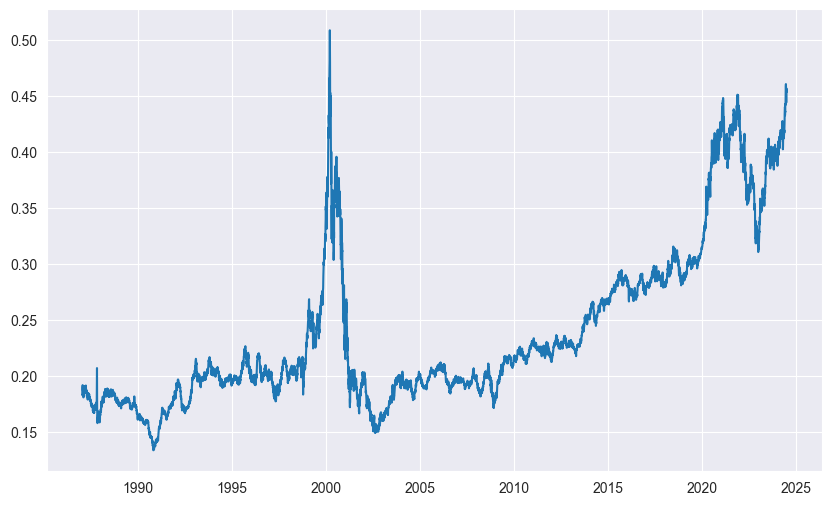

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(nasdaq['Adj Close'] / dow['Close'])
plt.show()

Invest by PE ratio
- buy when PE ratio is low
- sell when PE ratio is high
- can use technical indicators to define high-low